# 1. INTRODUCTION

>**Nama**   : Narendra <br>
**Batch**   : RMT 036 <br>
**Dataset** : Insurance.csv <br>

**Problem Statement** : <br>
(S) Diperlukannya faktor-faktor yang dapat menentukan prediksi premi asuransi yang harus dibayarkan setiap periode. (M) Harga premi dapat ditentukan dari umur, jenis kelamin, BMI, jumlah anak, gaya hidup merokok dan juga memungkinkan domisili regional-nya.(A) Untuk mencapai tujuan yang diharapkan, maka dapat dilakukan uji korelasi antara informasi yang ada dengan harga premi asuransi melalui dataframe [insurance.csv]('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv'). (R) Mengetahui pengaruh masing-masing kondisi yang disebutkan sebelumnya melalui modeling dapat memberikan gambaran untuk harga premi, termasuk faktor apa yang kuat mempengaruhi dan tidak mempengaruhi. (T)Hasil dari prediksi ini dapat langsung didaptakan ketika proses analisa melalui machine learning selesai dilakukan. 

**Objective** : <br>
Project ini bertujuan untuk menghasilkan model yang dapat memprediksi harga premi asuransi yang harus dibayarkan nasabah berdasar kondisi yang dimiliki, kondisi tersebut meliputi umur, jenis kelamin, BMI, jumlah anak, Kebiasaan Merokok dan Region nasabah berdomisili.

# 2. IMPORT LIBRARIES

Tahapan import libraries dilakukan untuk tujuan kesiapan environment notebook dalam melakukan seluruh rangkaian modeling. Beberapa libraries yang diimport memiliki fungsi dalam pemrosesan data secara mendasar yaitu ```pandas``` yang digunakan dalam komputasi dataframe secara umum dan ```numpy``` yang digunakan untuk komputasi numerik atau matematis dasar. Selain itu juga dibutuhkan library yang dapat digunakan untuk visualisasi data seperti ```matplotlib.pyplot``` dan ```seabron```. Libraries dan package lanjutan yang lain juga akan digunakan, dan dapat ditambahakan pada bagian ini seiring dengan berjalannya proses modeling secara keseluruhan.

In [1]:
#primary libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#advanded libraries import
from sklearn.model_selection import train_test_split    #for train test split
from scipy.stats import kendalltau, pearsonr            #for correlation examination
from sklearn.preprocessing import MinMaxScaler          #for feature scaling
from sklearn.preprocessing import OrdinalEncoder        #for feature encoding
from sklearn.linear_model import LinearRegression       #for model definition

# 3. DATA LOADING

Pada tahapan ini, selain akan dilakukan data loading, juga akan dilakukan beberapa observasi terhadap dataframe sebagai dasar perlakuan yang akan diterapkan dalam proses data cleaning. Tujuan akhir yang diharapkan nantinya adalah dataframe yang sudah cleaned dapat diproses lebih lanjut pada tahapan Exploratory Data Analysis. Berikut adalah poin-poin yang akan dilakukan dalam observasi: <br>

3.1 Observasi Dimensi Dataframe <br>
3.2 Observasi Unique Values <br>
3.3 Observasi Missing Values <br>
3.4 Observasi Duplikasi <br>
3.5 Observasi Penamaan Kolom


In [2]:
#load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
# duplicate copy
df = df_ori.copy()
#show df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


>Dataframe telah berhasil di-loading dan ditampilkan. Selanjutnya akan dilakukan observasi dasar terhadap dimensi dari dataframe yang digunakan.

## 3.1 Observasi Dimensi Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>**Insight :**  Gambaran dimensi dataframe didapatkan melalui pengecekan ```df.info()``` , yaitu terdapat 7 kolom dan 1338 baris. Insight lain yang dapat ditarik adalah terkait tipe data pada setiap kolom yang sudah sesuai dengan konteks value masing-masing kolom. Pembahasan lebih detail terhadap values setiap kolom berada pada bagian observasi unique values selanjutnya.

## 3.2 Observasi Unique Values

Bagian observasi unique values ini menjadi bagian yang cukup penting dalam observasi dataframe. Disamping tujuan kesiapan data pada tahapan EDA selanjutnya, observasi unique value juga dapat memberikan insight dan pemahaman yang komprehensif terterkait *business understanding* terhadap dataframe. Pemahaman fungsi dan konteks setiap kolom akan dilakukan bersamaan dengan pengamatan kesesuaian atributnya, contohnya adalah kesesuaian tipe data. Asumsi awal terkait dengan hubungan antar kolom juga dapat ditarik pada proses ini. 

In [4]:
#Query ini dilakukan untuk mendapatkan gambran awal terhadap masing-masing kolom
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Query ini dilakukan untuk melihat jumlah unique value setiap kolom
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
#unique values pada region perlu diobservasi lebih lanjut untuk mendapat gambaran dataframe yang lebih relevan
print(df['region'].value_counts())
print(f"Total berjumlah: {df['region'].value_counts().sum()} value")


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Total berjumlah: 1338 value


Dari tiga query yang dilakukan di atas, maka dapat disimpulkan bahwa variasi unique values dalam setiap kolom  menampilkan jumlah yang relevan, dengan beberapa detail di bawah ini: 
1. Values kolom **Age** berkisar antara 17 tahun sampai 64 tahun, hal ini relevan dengan variasi yang berjumlah 47 sehingga data ['age'] memiliki persebaran di setiap umur dari 17 tahun sampai 64 tahun.
2. Values kolom **Sex** merupakan nilai binominal yaitu laki-laki atau perempuan sehingga memiliki relevansi dengan jumlah unique values sebanyak 2.
3. Values kolom **BMI** merupakan numerikal continues yang jumlah variasinya sangat tinggi, didukung dengan bentuk bilangan yang decimal. Skor BMI yang paling rendah adalah 15,9 sedangkan yang paling tinggi adalah 53,1. Walaupun bersifat contiues, Skor BMI juga memiliki batasan, karena mengindikasikan keidealan kondisi tubuh berdasarkan tinggi dan berat badan, semakin tinggi BMI semakin mengindikasikan obesitas sedangkan semakin rendah maka mengindikasikan underweight. Berdasarkan [NHS Inform]('https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-management/body-mass-index-bmi/') rentang skor BMI yang mengindikasikan 'healty range' adalah 18.5 dan 24.9.
4. Values kolom **Children** memiliki value yang relevan jika dilihat dari deskripsi dataframe dan number of unique-nya, yaitu bervariasi antara 0 (tidak memiliki anak) sampai pada jumlah 5 anak, sehingga menghasilkan range unique values sebesar 6.
5. Values kolom **Smoker** memiliki value yang relevan karena memuat value binomnial sama seperti dengan gender, yaitu berisi ya atau tidak, yang diartikan sebagai 'merokok' atau 'tidak merokok'.
6. Values kolom **Region** membagi dataset ke dalam empat region, dan tidak ada missing value didalamnya sesuai dengan jumlah ```sum value_counts```.
7. Values kolom **Charges** memuat nilai nominal yang diterapkan kepada individu di baris yang sama. Tipe data float sesuai dengan konteks currency kolom ini. Asumsi lainnya yang dapat ditarik adalah periode charges ini diterapkan per-tahun yang diperkirakan dari jumlah nominal-nya yang cukup tinggi.

>**Insight**: dari proses observasi unique values dapat disimpulkan bahwa values yang ada dalam dataframe sudah tersedia dengan rapih dan sesuai dengan konteks bisnis atau objektif awal projek ini. Sampai tahap ini belum ada tahapan lebih lanjut yang perlu diperlakukan terhadap dataframe.

## 3.3 Observasi Missing Values 

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

>**Insight**: tidak ada missing values untuk setiap kolom, dapat divalidasi dengan query ```df.info()``` sebelumnya bahwa setiap kolom tidak memiliki null values. Tidak ada treatmen yang akan dilakukan dari proses observasi ini.

## 3.4 Observasi Duplikasi

In [8]:
#cek duplicate
df.duplicated().sum()

1

In [9]:
duplicated = df.duplicated()
duplicated.value_counts()

False    1337
True        1
Name: count, dtype: int64

Didapatkan sebuah baris yang merupakan value duplikasi melalui query di atas, sehingga perlu dilakukan drop duplicates pada tahapan ini. Pertimbangan untuk dilakukan drop duplikat adalah karena jumlah yang sangat kecil dan hampir tidak mempengaruhi persebaran dan kuantitas data kedepannya, karena jumlahnya hanya 1 baris yaitu sangat jauh dari 1% dari total data yang ada.

In [10]:
#drop duplicate
df.drop_duplicates(inplace=True)
#re-check duplicate after drop
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


>Saat ini dimensi dataframe berjumlah 1337 baris dan tetap dengan 7 kolom. Untuk penamaan dan pemanggilan dataframe tidak berubah, tetap menggunakan ``df``.

## 3.5 Observasi Nama Kolom

Observasi nama kolom dilakukan untuk validasi apakah nama kolom sudah relevan dan clear dari distorsi berupa str strip atau karakter spasi yang berlebihan. Tujuannya adalah untuk reliability dalam pemanggilan nama kolom pada tahapan-tahapan selanjutnya. 

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

> Dari pengecekan nama kolom, didapatkan bahwa tidak terdapat str strips, sehingga tidak perlu dilakukan drop str.strips. Selain itu, perubahan nama kolom juga tidak perlu dilakukan karena sudah merepresentasikan value dari masing-masing kolom baik dalam Bahasa Inggris maupun bahasa Indonesia.

**Kesimpulan Tahapan Loading dan Observasi Data**

Kesimpulan pada proses observasi data adalah ``df`` yang digunakan secara umum sudah bersih dan layak untuk diproses pada tahapan Exploratory Data Analysis. Tidak ditemukan adanya ketidak-rapihan yang ekstrim baik dari missing values, tipe data atau nama kolom. Hanya dilakukan tretmen ```drop.duplicate()``` yang menghilangkan 1 baris saja.

# 4. EXPLORATORY DATA ANALYSIS

Berdasarkan tahapan observasi di atas, dapat disimpulkan bahwa dataframe memuat informasi-informasi tentang kondisi insani/individual terkait dengan analisis resiko pribadi yang mungkin dialami. Pada akhirnya akan digunakan untuk menerapkan besaran premi yang harus dibayarkan. Kolom umur, jenis kelamin, BMI dan Kebiasaan Merokok mendefinisikan kondisi kesehatan individu di baris tersebut. Sedangkan kolom jumlah anak mendifinisikan jumlah jiwa yang tertanggung yang mungkin mempengaruhi besarnya impact ketika sebuah resiko terjadi. Tidak memiliki dan memiliki anak akan menyebabkan penerapan premi yang berbeda, begitupun pula dengan perbedaan jumlah anak, semakin banyak jumlah anak kemungkinan akan menimbulkan harga premi yang semakin tinggi. Region juga merupakan faktor yang mempengaruhi premi, atau dalam konteks data ini adalah Charges, Region akan menentukan biaya hidup sehingga menentukan harga pasaran premi atau juga dapat menentukan tren terjadinya resiko kepada pemegang polis. Setelah keenam kolom sebelumnya, kolom Charges dapat dimengerti sebagai kolom yang values-nya dependen dengan keenam kolom sebelumnya, yaitu berapa harga yang harus dibayarkan sesuai dengan kondisi pemegang polis. Seluruh asumsi yang tersebut sebelumnya akan dievaluasi pada bagian EDA ini dan dilanjutkan pada Feature Selction pada bagian selanjutnya.

Tujuan dari dilakukannya projek ini adalah untuk menghasilkan algoritma yang dapat menentukan harga premi atau Charges yang harus dibayarkan dalam faktor yang berbeda-beda. Selain kolom ``['Charges']``, enam kolom lainnya dapat ditetapkan sebagai faktor-faktor yang berhubungan atau memiliki korelasi berdasarkan penjabaran diatas. Sehingga pada tahapan Feature Selection nantinya, kolom charges dapat dipishkan secara solo sebagai Target disamping enam kolom lainnya sebagai Feature. Sebelum itu akan dilakukan EDA untuk mendapatkan penjabaran hubungan antara kolom-kolom yang memungkinkan memiliki relevansi.

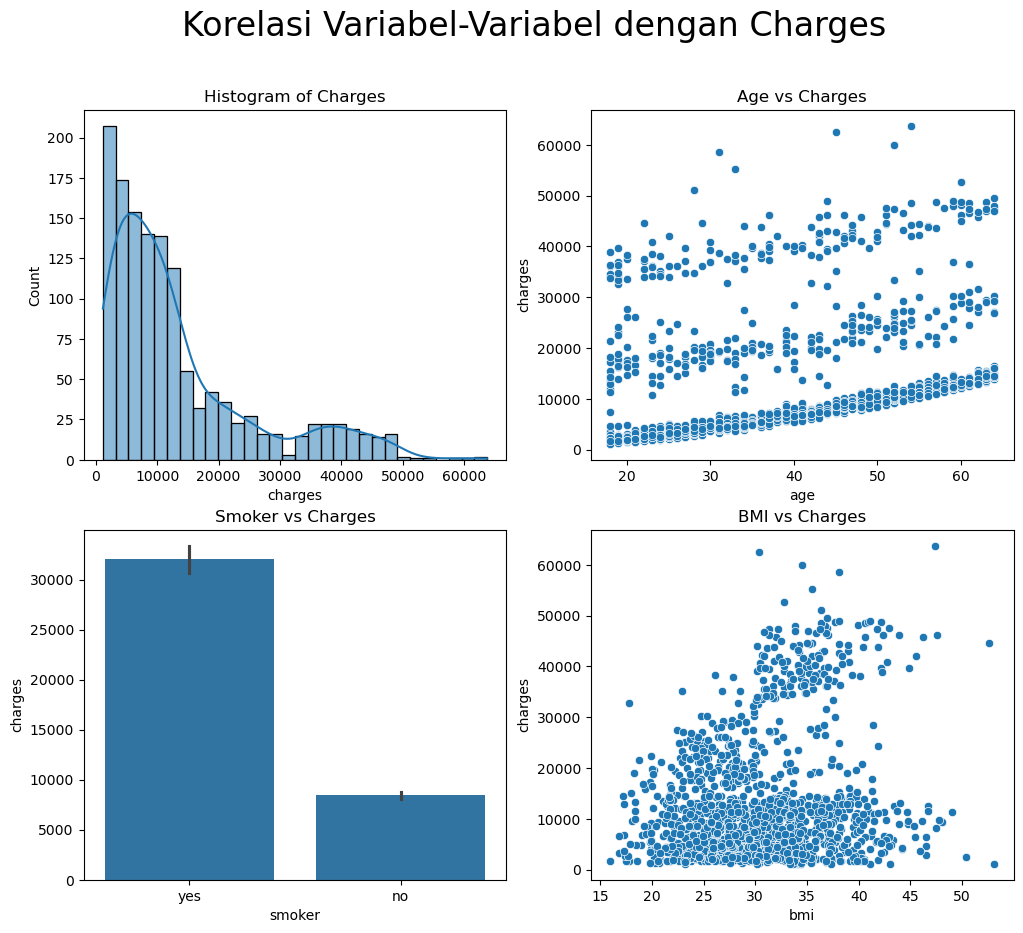

In [13]:
#Create Histogram and Scatter Plot

#Create Canvas
plt.figure(figsize = (12,10))
plt.suptitle('Korelasi Variabel-Variabel dengan Charges', fontsize=24)

# Plot 1 taruh kiri atas
plt.subplot(2,2,1)
sns.histplot(df.charges, kde=True, bins=30)
plt.title('Histogram of Charges')

#plot 3 taruh kiri tengah
plt.subplot(2,2,2)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

#plot 4 taruh kanan tengah
plt.subplot(2,2,3)
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

#plot 5 taruh kanan bawah
plt.subplot(2,2,4)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')


plt.show()

Berdasarkan visualisasi setiap variabel maka dapat diasumsikan terdapat hubungan atau korelasi dengan Charges, lebih detailnya adalah sebagai berikut:
1. Persebaran data Charges sendiri memiliki persebaran data yang skewed secara positif jika dilihat dari bentuk histogram dan kurva-nya. Mayoritas Charges terkonsentrasi pada harga yang rendah, yaitu di sekitar angka $1000. Tentunya akan terdapat outlier yang cukup tinggi jumlahnya pada sekitar persebaran Charges yang tinggi, tetapi hal ini akan dilanjutkan secara lebih detail pada tahapan handling outlier pada bagian Feature Engineering.
2. Hubungan Age dengan Charges dapat disimpulkan cenderung terdapat korelasi yang positif, yaitu semakin tinggi Age atau semakin besar umur pemegang polis, maka semakin tinggi juga premi yang harus dibayarkan. Dari pola scatterplot yang ada, dapat diasumsikan juga bahwa Age memiliki korelasi dengan Charges, tetapi ada faktor lain yang mempengaruhi disamping Age itu sendiri. Hal tersebut terindikasi dari adanya tiga kelompok scatter yang cenderung berkorelasi secara positif.
3. Korelasi antara BMI dengan Charges dapat ditunjukkan dengan adanya konsentrasi Charges atau premi yang tinggi untuk skor BMI di atas 30. Sedangkan untuk skor BMI dibawah 30, konsentrasi chargenya cenderung tidak lebih dari $3000. Kondisi tersebut juga relevan dengan konteks [ideal skor BMI]('https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-management/body-mass-index-bmi/') yaitu pada range 18.5 dan 24.9, atau dapat dibulatkan pada skala 20 sampai 25 pada scaterplot.
4. Kebiasaan merokok memiliki korelasi yang jelas terhadap pengaruh Charges, yaitu untuk pemegang polis yang merkokok, rata-rata premi yang diterapkan jauh lebih tinggi dibanding yang tidak merokok. 

>**Note**: Kolom ```['age']```, ```['bmi']``` dan ```['smoker']``` dipilih untuk diilakukan explorasi hubungannya dengan kolom ```['charges']``` karena berupa value numerik, sehingga relevan untuk digambarkan melalui scatterplot sesuai dengan banyaknya cardinal. Selain itu, kolom-kolom yang dipilih juga diasumsikan paling relevan dalam konteks bisnis untuk menetapkan harga premi asuransi, sehingga kolom ```['smoker']``` juga dimasukkan walaupun merupakan kategorikal binominal. Untuk kolom-kolom lainnya akan dilakukan explorasi menggunakan query groupping.

In [14]:
charges_smoker_yes = df[df['smoker']=='yes']['charges'].mean().round(2)
charges_smoker_no = df[df['smoker']=='no']['charges'].mean().round(2)

charges_smoker = df.groupby('smoker')['charges'].mean().round(2)
print(charges_smoker)
print (f'selisih rata-rata charges adalah: ${charges_smoker_yes - charges_smoker_no}')

smoker
no      8440.66
yes    32050.23
Name: charges, dtype: float64
selisih rata-rata charges adalah: $23609.57


>**Note**: Karena `smoker` memiliki perbedaan yang signifikan pada hasil visualisasi, maka dilakukan eksplorasi lebih lanjut melalui grouping pada query di atas.

In [15]:
charges_region = df.groupby('region')['charges'].mean().round(2)
charges_region

region
northeast    13406.38
northwest    12450.84
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

In [16]:
charges_children = df.groupby('children')['charges'].mean().round(2)
charges_children

children
0    12384.70
1    12731.17
2    15073.56
3    15355.32
4    13850.66
5     8786.04
Name: charges, dtype: float64

In [17]:
charges_sex = df.groupby('sex')['charges'].mean().round(2)
charges_sex

sex
female    12569.58
male      13975.00
Name: charges, dtype: float64

>Melalui tiga exploratori sederhana di atas, hubungan masing-masing kolom yaitu `region`, `children` dan `sex` dengan kolom `charges` tidak memiliki korelasi yang signifikan berdasarkan selisih rata-rata harga premi nya. Akan dilakukan uji korelasi pada tahapan Feature Selection.

**Kesimpulan EDA:**

Berdasarkan eksplorasi hubungan setiap variabel dengan ``['charges']`` maka dapat ditentukan bahwa kolom-kolom yang memiliki korelasi yang tinggi dan berpotensi menadji fitur pada proses feature engineering adalah: `Age`,`BMI` dan `Smoker`. Selanjutnya akan dilakukan pengecekan cardinality untuk kolom-kolom kategorikal tersebut pada proses featrure engineering.


# 5. Feature Engineering

## 5.1 Handling Cardinality

In [18]:
cat_cols = list(df.select_dtypes(include = 'object').columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique', 'Nilai Unique'], data=listItem)

,Nama Kolom,Jumlah Unique,Nilai Unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"


>Cardinality pada ketiga kolom kategorikal di atas menunjukkan jumlah unique yang rendah, paling banyak hanya pada `region` sebanyak 4 unique. Diputuskan tidak dilakukan handling atau teratment apapun pada proses ini.

## 5.2 Split between X (Features) and y (target)

Split Feature dan Target dilakukan sesuai dengan objective awal pekerjaan ini, yaitu untuk memngetahui faktor apa saja yang menjadi pengaruh dari `charges` dan berapa besar pengaruh masing-masing faktornya. Dengan demikian, perlu dilakukan pemisahan `charges` sebagai Target dan enam kolom lainnya sebagai Features.

In [47]:
#create feature dataframe
X = df.drop(['charges'], axis = 1)
# create target list
y = df['charges']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 73.1+ KB


In [48]:
#check target list
y.info()

<class 'pandas.core.series.Series'>
Index: 1337 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


>berdasar dimensi data antara df X dan list y di atas, tahapan split Target dan Feature telah berhasil dengan kesamaan jumalah baris dan total kolom dari kedua data tersebut yang berjumlah 7.

## 5.3 Split between Train Set and Test Set

In [21]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1069, 6)
Test Size (268, 6)


Split Train dan Test dilakukan dengan proporsi 80% Train dan 20% Test, dilakukan melalui query `test_size = 0.2` dan membuat sampling tidak berubah-ubah setiap query di-run melalui `random_state = 12`.

## 5.4 Handling Outliers

In [22]:
#check distribution form skewness 

#create numeric columns for disribution check, not for feature scaling
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,0.1,normal
1,bmi,0.3,normal
2,children,1.0,skewed


Semua data terdistribusi normal kecuali kolom `children`. Selanjutnya, akan dilihat batas atas dan batas bawah dan presentase outlier pada masing-masing kolom.

In [23]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,81.73,-3.64,0.00
1,bmi,48.95,12.31,0.28
2,children,8.00,-6.00,0.00


In [24]:
#compare with column stats
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1069.0,39.05,14.23,18.00,26.0,39.0,51.00,64.00
bmi,1069.0,30.63,6.11,16.82,26.2,30.3,34.58,53.13
children,1069.0,1.07,1.19,0.00,0.0,1.0,2.00,5.00


Outlier tersebar pada bagian atas upper boundaries `bmi`. tetapi karena jumlahnya tidak mencapai 1% dan selisih up-bond dengan outlier adalah 4 BMI skor ( 53 - 49 ). Dengan kondisi ini, maka tidak dilakukan treatment capping atau triming melainkan akan dilakukan retaining karena merupakan variasi nilai yang natural, walaupun bmi index 53 encerminkan obesitas tinggkat tinggi.

## 5.5 Handling Missing Values

In [25]:
X_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [26]:
X_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Tidak ada missing values baik dalam data fitur test maupun train, dapat diperkiranakan pada bagian awal (Data Loading) bahwa tidak terdeteksi adanya missing values.

## 5.6 Split Numeric Columns and Categorical Columns

Split numeric dan categorical columns dilakukan untuk tujuan feature encoding dan feature scaling pada bagian setelah ini. Perlakuan ini dilakukan pada kolom Feature atau kolom `X` baik pada X train maupun X test.

In [27]:
# Get numeric and categorical column for decoding and scaling

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()

cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['age', 'bmi', 'children']
Categorical Columns :  ['sex', 'smoker', 'region']


In [28]:
#put numerical and categorical columns to train and test

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,bmi,children
161,18,36.850,0
1033,18,21.565,0
151,48,29.700,0
760,22,34.580,2
362,19,21.700,0
...,...,...,...
278,59,31.790,2
432,42,26.900,0
1284,61,36.300,1
1266,55,30.500,0


## 5.7 Features Selection

X_train

In [29]:
X_train

,age,sex,bmi,children,smoker,region
161,18,female,36.850,0,yes,southeast
1033,18,male,21.565,0,yes,northeast
151,48,male,29.700,0,no,southeast
760,22,female,34.580,2,no,northeast
362,19,female,21.700,0,yes,southwest
...,...,...,...,...,...,...
278,59,male,31.790,2,no,southeast
432,42,male,26.900,0,no,southwest
1284,61,male,36.300,1,yes,southwest
1266,55,female,30.500,0,no,southwest


## 5.7 Correlation Examination Using Kendall and Pearson

In [30]:
# from scipy.stats import kendalltau, pearsonr

# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,sex,tidak ada korelasi
1,smoker,ada korelasi
2,region,tidak ada korelasi


In [31]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,age,ada korelasi
1,bmi,ada korelasi
2,children,ada korelasi


feature yang tidak ada korelasinya terdapat pada data split categorical, yaitu sex dan region, sesuai juga dengan analisa pada awal notebook ini yang menginidikasikan perbedaan yang kecil pada region dan sex untuk perngaruhnya terhadap charges.

In [32]:
#Drop column 'sex' dan 'region'

X_train_cat.drop(['sex','region'], axis = 1, inplace = True)
X_test_cat.drop(['sex','region'], axis = 1, inplace = True)
X_train_cat

/var/folders/zx/dlj5gs9j6y78jbd2p30zvbt00000gn/T/ipykernel_41689/1982606484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop(['sex','region'], axis = 1, inplace = True)
/var/folders/zx/dlj5gs9j6y78jbd2p30zvbt00000gn/T/ipykernel_41689/1982606484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop(['sex','region'], axis = 1, inplace = True)


,smoker
161,yes
1033,yes
151,no
760,no
362,yes
...,...
278,no
432,no
1284,yes
1266,no


sehingga yang tersisa pada kolom kategorikal hanyalah smoker saja.

## 5.8 Feature Scalling (for Numerical Features)

In [33]:
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.5517004 , 0.        ],
       [0.        , 0.13079994, 0.        ],
       [0.65217391, 0.35481206, 0.        ],
       ...,
       [0.93478261, 0.53655514, 0.2       ],
       [0.80434783, 0.37684153, 0.        ],
       [0.45652174, 0.36100785, 0.2       ]])

## 5.9 Feature Encoding (for Categorical Features)

In [34]:
X_train_cat

,smoker
161,yes
1033,yes
151,no
760,no
362,yes
...,...
278,no
432,no
1284,yes
1266,no


In [35]:
X_test_cat

,smoker
937,no
729,no
1307,yes
925,no
137,no
...,...
224,yes
1245,no
1087,no
913,no


In [36]:
#Feature Encoding using Ordinal Encoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

## 5.10 Concate Numeric Columns and Categorical Columns 

In [37]:
#Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

X_train_final

array([[0.        , 0.5517004 , 0.        , 0.        , 1.        ],
       [0.        , 0.13079994, 0.        , 0.        , 1.        ],
       [0.65217391, 0.35481206, 0.        , 1.        , 0.        ],
       ...,
       [0.93478261, 0.53655514, 0.2       , 0.        , 1.        ],
       [0.80434783, 0.37684153, 0.        , 1.        , 0.        ],
       [0.45652174, 0.36100785, 0.2       , 0.        , 1.        ]])

# 6. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [38]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

# 7. Model Training

>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [39]:
#Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [40]:
#Lihat hasil prediksi

y_pred_train = model_lin_reg.predict(X_train_final)

y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([27200., 22848.,  9856., ..., 38848., 11968., 31296.])

In [41]:
y_train

161     36149.48350
1033    13747.87235
151      7789.63500
760      3925.75820
362     13844.50600
           ...     
278     12928.79110
432      5969.72300
1284    47403.88000
1266    10704.47000
1278    22462.04375
Name: charges, Length: 1069, dtype: float64

In [42]:
#Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))

Error - Train set :  4023.0268357053324


In [43]:
print('Error - Test set: ', mean_absolute_error(y_test, y_pred_test))

Error - Test set:  4672.015982201493


# 9. Model Saving

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [44]:
#Save the files
import pickle
import json

#save the files!
with open('model_lin_reg.pkl', 'wb') as file_1: #wb = write binary
    pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2: #wb = write binary
    pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3: #wb = write binary
    pickle.dump(encoder, file_3)

with open('num_cols.txt', 'w' ) as file_4: #wb = write binary
    json.dump(num_cols, file_4)

with open('cat_cols.txt', 'w') as file_5: #wb = write binary
    json.dump(cat_cols, file_5)

# 10. Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.